# Transformation Operations on the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
curr_dir = os.getcwd()
print(curr_dir)

/teamspace/studios/this_studio/Preprocessing Eflow Images/code_dataset3


## 1. Importing Data

In [3]:
signal = pd.read_csv('/teamspace/studios/this_studio/Preprocessing Eflow Images/data/dataset3/sig_btagged2jets.txt', sep = '\t')
background = pd.read_csv('/teamspace/studios/this_studio/Preprocessing Eflow Images/data/dataset3/bg_btagged2jets.txt', sep = '\t')

In [4]:
signal.columns

Index(['eventno', 'jetmultiplicity', 'axion_Eta', 'axion_Phi', 'axion_pT',
       'axion_Px', 'axion_Py', 'axion_Pz', 'axion_E', 'Z_Eta', 'Z_Phi', 'Z_pT',
       'Z_Px', 'Z_Py', 'Z_Pz', 'Z_E', 'highb_Eta', 'highb_Phi', 'highb_pT',
       'highb_Px', 'highb_Py', 'highb_Pz', 'highb_E', 'lowb_Eta', 'lowb_Phi',
       'lowb_pT', 'lowb_Px', 'lowb_Py', 'lowb_Pz', 'lowb_E', 'genphoton_Eta',
       'genphoton_Phi', 'genphoton_pT', 'genphoton_Px', 'genphoton_Py',
       'genphoton_Pz', 'genphoton_E', 'jet1_Eta', 'jet1_Phi', 'jet1_pT',
       'jet1_Px', 'jet1_Py', 'jet1_Pz', 'jet1_E', 'jet2_Eta', 'jet2_Phi',
       'jet2_pT', 'jet2_Px', 'jet2_Py', 'jet2_Pz', 'jet2_E', 'jet3_Eta',
       'jet3_Phi', 'jet3_pT', 'jet3_Px', 'jet3_Py', 'jet3_Pz', 'jet3_E',
       'jet4_Eta', 'jet4_Phi', 'jet4_pT', 'jet4_Px', 'jet4_Py', 'jet4_Pz',
       'jet4_E', 'isophoton_Eta', 'isophoton_Phi', 'isophoton_pT',
       'isophoton_Px', 'isophoton_Py', 'isophoton_Pz', 'isophoton_E',
       'jet1_btag', 'jet2_btag', 'je

In [5]:
background.columns

Index(['eventno', 'jetmultiplicity', 'highb_Eta', 'highb_Phi', 'highb_pT',
       'highb_Px', 'highb_Py', 'highb_Pz', 'highb_E', 'lowb_Eta', 'lowb_Phi',
       'lowb_pT', 'lowb_Px', 'lowb_Py', 'lowb_Pz', 'lowb_E', 'genphoton_Eta',
       'genphoton_Phi', 'genphoton_pT', 'genphoton_Px', 'genphoton_Py',
       'genphoton_Pz', 'genphoton_E', 'jet1_Eta', 'jet1_Phi', 'jet1_pT',
       'jet1_Px', 'jet1_Py', 'jet1_Pz', 'jet1_E', 'jet2_Eta', 'jet2_Phi',
       'jet2_pT', 'jet2_Px', 'jet2_Py', 'jet2_Pz', 'jet2_E', 'jet3_Eta',
       'jet3_Phi', 'jet3_pT', 'jet3_Px', 'jet3_Py', 'jet3_Pz', 'jet3_E',
       'jet4_Eta', 'jet4_Phi', 'jet4_pT', 'jet4_Px', 'jet4_Py', 'jet4_Pz',
       'jet4_E', 'isophoton_Eta', 'isophoton_Phi', 'isophoton_pT',
       'isophoton_Px', 'isophoton_Py', 'isophoton_Pz', 'isophoton_E',
       'jet1_btag', 'jet2_btag', 'jet3_btag', 'jet4_btag', 'invmass_2j1p',
       'delta_eta_jet1_jet2', 'delta_phi_jet1_jet2', 'deltaR_jet1_jet2'],
      dtype='object')

## 2. Extracting the required columns

In [6]:
columns = ['isophoton_Eta', 'isophoton_Phi', 'jet1_Eta', 'jet1_Phi','jet2_Eta', 'jet2_Phi']
signal_columns_extract = signal[columns]
background_columns_extract = background[columns]

In [7]:
signal_columns_extract.columns

Index(['isophoton_Eta', 'isophoton_Phi', 'jet1_Eta', 'jet1_Phi', 'jet2_Eta',
       'jet2_Phi'],
      dtype='object')

In [8]:
signal_columns_extract.head()

,isophoton_Eta,isophoton_Phi,jet1_Eta,jet1_Phi,jet2_Eta,jet2_Phi
0,0.214053,2.494540,-0.014393,-0.208869,-0.115036,-1.73382
1,1.075320,-2.772420,1.303590,-0.449611,0.691798,1.31142
2,-1.147960,2.543960,-0.787717,0.477499,-0.615190,-1.41727
3,-2.373360,1.110120,-0.952813,2.817070,-0.061371,-1.78392
4,0.994138,0.083512,1.871150,2.811970,2.268700,-1.66532


In [9]:
background_columns_extract.columns

Index(['isophoton_Eta', 'isophoton_Phi', 'jet1_Eta', 'jet1_Phi', 'jet2_Eta',
       'jet2_Phi'],
      dtype='object')

# 3. Defining Required functions

In [10]:
class preprocessData():
    '''
    columns = ['isophoton_Eta', 'isophoton_Phi', 'jet1_Eta', 'jet1_Phi','jet2_Eta', 'jet2_Phi']
    '''
    def __init__(self):
        pass

    def shift_origin(self,x:pd.DataFrame) -> pd.DataFrame:
        #TODO: Take coordinates and subtract origin coordinates from it.
        # 1. Storing isophoton coordinates as origin
        origin = x.loc[:,['isophoton_Eta', 'isophoton_Phi']].values
    
        # 2. Subtracting origin from cooridnates of isophoton, jet1, jet2
        isophoton_shift_coor = x.loc[:,['isophoton_Eta', 'isophoton_Phi']].values - origin
        jet1_shift_coor = x.loc[:,['jet1_Eta', 'jet1_Phi']].values - origin
        jet2_shift_corr = x.loc[:,['jet2_Eta', 'jet2_Phi']].values - origin
    
        # Returning a new dataframe after concatenating updated coordinates
        return pd.DataFrame(np.concatenate([isophoton_shift_coor, jet1_shift_coor, jet2_shift_corr], axis = 1), columns = ['isophoton_Eta', 'isophoton_Phi', 'jet1_Eta', 'jet1_Phi', 'jet2_Eta', 'jet2_Phi'])

    def rotate_coordinates(self,x:pd.DataFrame) -> pd.DataFrame:
        #TODO: Rotate the plane such that Jet1 lies below isophoton(origin)
        y_axis = 0,-1 # -Y axis
        rotated_coordinates = pd.DataFrame(x[['isophoton_Eta', 'isophoton_Phi']])
        jet1_rotated = []
        jet2_rotated = []
        # Loop for rotating each row by the corresponding theta
        for i in range(len(x)):
            row = x.iloc[i]
            # calculating theta using dot product between jet1 vector and -Y axis
            theta = np.arccos(np.dot(row.loc[['jet1_Eta', 'jet1_Phi']].values, y_axis)/np.linalg.norm(row.loc[['jet1_Eta', 'jet1_Phi']]))
            if row.loc['jet1_Eta'] < 0:
                theta = -theta
            # Rotation matrix that rotates clockwise by theta
            rotation_matrix = np.array([
            [np.cos(-theta), -np.sin(-theta)],
            [np.sin(-theta),  np.cos(-theta)]
            ])
            # Operating rotation matrix on jet1 and jet2
            jet1_rotated.append((rotation_matrix @ (row.loc[['jet1_Eta', 'jet1_Phi']].values).T).T)
            jet2_rotated.append((rotation_matrix @ (row.loc[['jet2_Eta', 'jet2_Phi']].values).T).T)
            
        jet1_rotated = np.array(jet1_rotated) # list to array
        jet2_rotated = np.array(jet2_rotated)
        # Storing the rotated data as columns of a new dataframe
        rotated_coordinates['jet1_Eta'] = jet1_rotated[:,0]
        rotated_coordinates['jet1_Phi'] = jet1_rotated[:,1]
        rotated_coordinates['jet2_Eta'] = jet2_rotated[:,0]
        rotated_coordinates['jet2_Phi'] = jet2_rotated[:,1]
    
        return rotated_coordinates

    def bound_phi(self, x:pd.DataFrame) -> pd.DataFrame:
        '''
        Normalize angles to the range (-π, π)

        This function takes angular values in any range and normalizes them to lie 
        within (-π, π) using the following steps:
        
        1. Transform negative angles to positive:
           - Add 2π to negative angles to get angles in range (0, 2π)
           
        2. Map angles larger than π to their equivalent in (-π, 0):
           - For angles > π: result = -(2π - angle)
        '''
        jet1_phi = x['jet1_Phi'].values
        jet2_phi = x['jet2_Phi'].values
        isophoton_phi = x['isophoton_Phi'].values

        updated_phi = np.zeros((len(x), 3))
        object_iterator = iter([jet1_phi, jet2_phi, isophoton_phi])
        for col, obj in enumerate(object_iterator):
            for row, phi in enumerate(obj):
                if phi < 0:
                    updated_phi[row, col] = 2 * np.pi + phi
                else:
                    updated_phi[row, col] = phi

        for idx, phi in np.ndenumerate(updated_phi):
            if phi > np.pi:
                updated_phi[idx[0], idx[1]] = -1 * (2 * np.pi - updated_phi[idx[0], idx[1]])
        
        updated_x = x.copy()
        updated_x['jet1_Phi'] = updated_phi[:,0]
        updated_x['jet2_Phi'] = updated_phi[:,1]
        updated_x['isophoton_Phi'] = updated_phi[:,2]

        return updated_x

    def plot_eflow_objects(self, x, ax, *, title: str = 'Plot'):
        """
        Plot eflow objects on a specified subplot
        
        Parameters:
            x: data to plot
            ax: matplotlib axes object to plot on
            title: plot title (optional)
        """
        # Add horizontal and vertical lines
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)

        # Add horizontal lines at -π and π
        ax.axhline(-np.pi, color='red', linewidth=0.5, linestyle = '--')
        ax.axhline(np.pi, color='red', linewidth=0.5, linestyle = '--')
        
        # Add gridlines
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Set axis limits
        ax.set_xlim([-7,7])
        ax.set_ylim([-7,7])
        
        # Create scatter plots
        ax.scatter(x.loc['isophoton_Eta'], x.loc['isophoton_Phi'], 
                  label=f"Isophoton:({x.loc['isophoton_Eta']:.6f},{x.loc['isophoton_Phi']:.6f})")
        ax.scatter(x.loc['jet1_Eta'], x.loc['jet1_Phi'], 
                  label=f"Jet1:({x.loc['jet1_Eta']:.6f},{x.loc['jet1_Phi']:.6f})", marker = 'x')
        ax.scatter(x.loc['jet2_Eta'], x.loc['jet2_Phi'], 
                  label=f"Jet2:({x.loc['jet2_Eta']:.6f},{x.loc['jet2_Phi']:.6f})", marker = '.')
        
        # Set labels and title
        ax.set_title(title)
        ax.set_xlabel("$\eta$")
        ax.set_ylabel("$\phi$")
        ax.legend()
        plt.tight_layout()


    def plot_all(self, x, ax, *, title: str = 'Collective Plot'):
        """
        Plot all data points on a specified subplot
        
        Parameters:
            x: DataFrame containing the data to plot
            ax: matplotlib axes object to plot on
            title: plot title (optional)
        """
        # Add horizontal and vertical lines
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)

        # Add horizontal lines at -π and π
        ax.axhline(-np.pi, color='red', linewidth=0.5, linestyle = '--')
        ax.axhline(np.pi, color='red', linewidth=0.5, linestyle = '--')
        
        # Add gridlines
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Set axis limits
        ax.set_xlim([-7, 7])
        ax.set_ylim([-7, 7])
        
        # Create scatter plots
        ax.scatter(x.loc[:,'isophoton_Eta'], x.loc[:,'isophoton_Phi'], label='Isophoton')
        ax.scatter(x.loc[:,'jet1_Eta'], x.loc[:,'jet1_Phi'], label='Jet1', marker='x')
        ax.scatter(x.loc[:,'jet2_Eta'], x.loc[:,'jet2_Phi'], label='Jet2', marker='.', alpha = 0.8)
        
        # Set labels and title
        ax.set_xlabel("$\eta$")
        ax.set_ylabel("$\phi$")
        ax.set_title(title)
        ax.legend()


    def Euclidean_distance(self, x:pd.DataFrame , obj1:str = 'jet1', obj2:str = 'jet2') -> np.array:
        '''
        Calculate the Euclidean distance between the leading and subleading jets
        '''
        obj1_eta_phi = x[[obj1+'_Eta', obj1+'_Phi']].values
        obj2_eta_phi = x[[obj2+'_Eta', obj2+'_Phi']].values

        diff = obj1_eta_phi - obj2_eta_phi
        for idx, value in enumerate(diff):
            if np.abs(value[1]) > np.pi:
                diff[idx,1] = 2*np.pi - np.abs(value[1])

        # euclidean_distance = np.sqrt(np.sum((obj1_eta_phi - obj2_eta_phi)**2, axis = 1))
        euclidean_distance = np.sqrt(np.sum((diff)**2, axis = 1))
        return euclidean_distance


    def complete_transformation(self, x:pd.DataFrame,*, intermediate_bound_phi = True, final_bound_phi = True) -> pd.DataFrame:
        '''
        Function to do the origin shift, bounding phi, rotation and then bounding phi(optional) in on go.
        '''
        x_transformed = self.shift_origin(x)

        if intermediate_bound_phi:
            x_transformed = self.bound_phi(x_transformed)
        
        x_transformed = self.rotate_coordinates(x_transformed)

        if final_bound_phi:
            x_transformed = self.bound_phi(x_transformed)
            return x_transformed
        return x_transformed

    def invariant_mass(self, x:pd.DataFrame):
        '''
        Function to calculate invariant mass in each event
        '''
        total_energy = x.loc[:,['isophoton_E', 'jet1_E', 'jet2_E']].sum(axis = 1).values
        total_px = x.loc[:,['isophoton_Px', 'jet1_Px', 'jet2_Px']].sum(axis = 1).values
        total_py = x.loc[:,['isophoton_Py', 'jet1_Py', 'jet2_Py']].sum(axis = 1).values
        total_pz = x.loc[:,['isophoton_Pz', 'jet1_Pz', 'jet2_Pz']].sum(axis = 1).values

        inv_mass = np.sqrt(total_energy**2 - total_px**2 - total_py**2 - total_pz**2)
        return pd.DataFrame(inv_mass, columns = ['inv_mass'])





processor = preprocessData()

In [11]:
example_index = 99

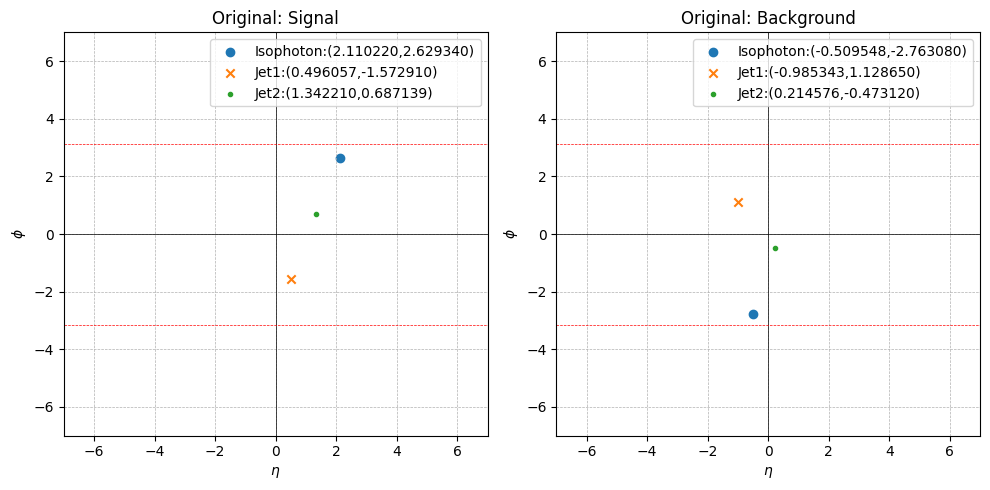

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
processor.plot_eflow_objects(signal_columns_extract.iloc[example_index,:],
                             axs[0], title = 'Original: Signal')
processor.plot_eflow_objects(background_columns_extract.iloc[example_index,:],
                             axs[1], title = 'Original: Background')

## 4. Shifting Origin to isolated photon position

In [13]:
signal_shifted = processor.shift_origin(signal_columns_extract)
background_shifted = processor.shift_origin(background_columns_extract)

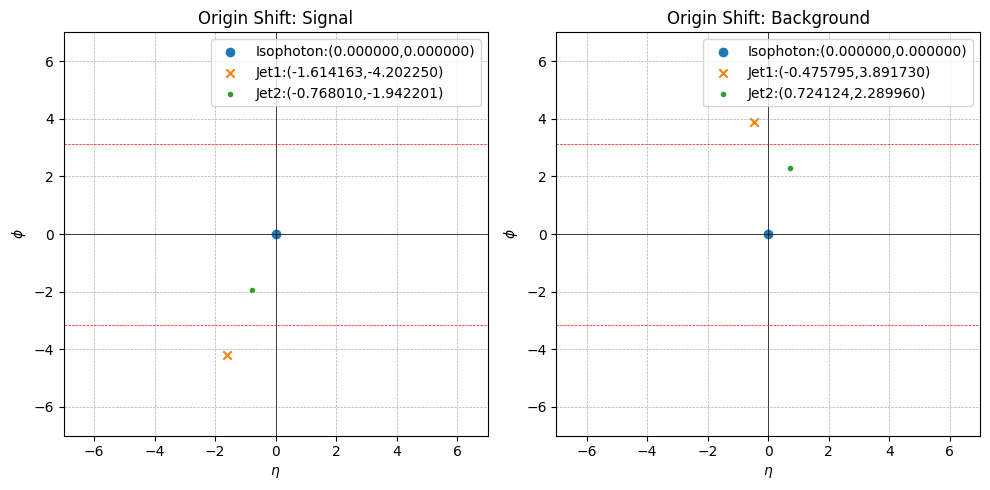

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
processor.plot_eflow_objects(signal_shifted.iloc[example_index,:],
                             axs[0], title = 'Origin Shift: Signal')
processor.plot_eflow_objects(background_shifted.iloc[example_index,:],
                             axs[1], title = 'Origin Shift: Background')

## 5. Bounding $\phi$ $\epsilon$ ($-\pi, \pi$)

In [15]:
# signal_shifted = processor.bound_phi(signal_shifted)
# background_shifted = processor.bound_phi(background_shifted)

In [16]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# processor.plot_eflow_objects(signal_shifted.iloc[example_index,:],
#                              axs[0], title = 'Bounding Phi: Signal')
# processor.plot_eflow_objects(background_shifted.iloc[example_index,:],
#                              axs[1], title = 'Bounding Phi: Background')

## 6. Rotating the Coordinates

In [17]:
signal_rotated = processor.rotate_coordinates(signal_shifted) 
background_rotated = processor.rotate_coordinates(background_shifted)

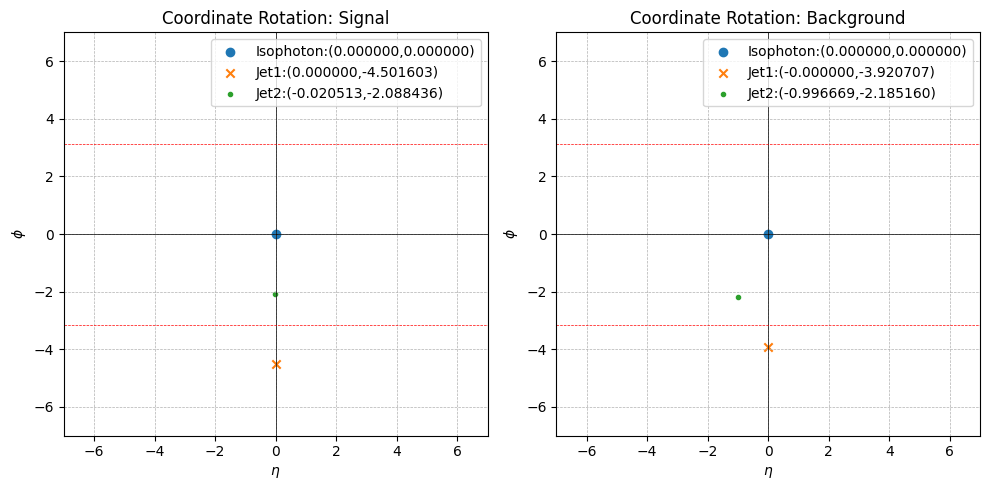

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
processor.plot_eflow_objects(signal_rotated.iloc[example_index,:],
                             axs[0], title = 'Coordinate Rotation: Signal')
processor.plot_eflow_objects(background_rotated.iloc[example_index,:],
                             axs[1], title = 'Coordinate Rotation: Background')

## 7. Bounding $\phi$ $\epsilon$ ($-\pi, \pi$)

In [19]:
signal_rotated = processor.bound_phi(signal_rotated) 
background_rotated = processor.bound_phi(background_rotated)

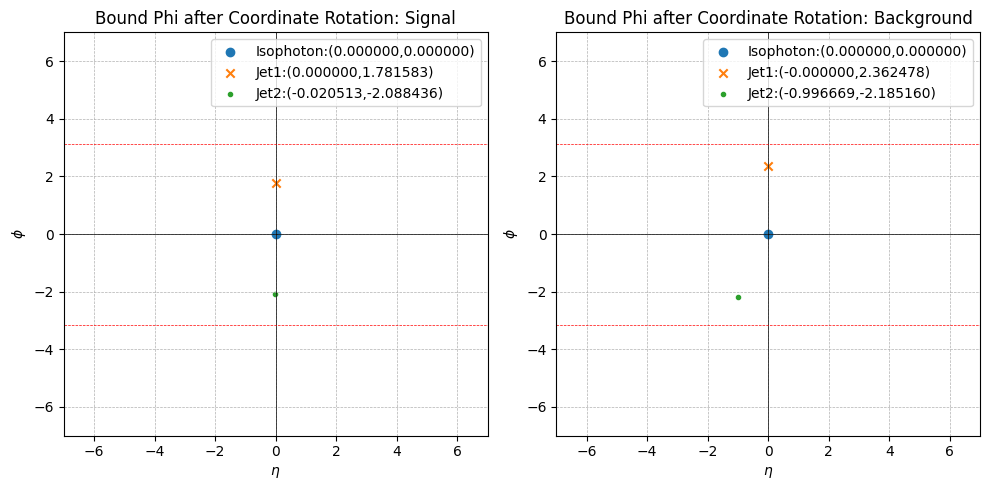

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
processor.plot_eflow_objects(signal_rotated.iloc[example_index,:],
                             axs[0], title = 'Bound Phi after Coordinate Rotation: Signal')
processor.plot_eflow_objects(background_rotated.iloc[example_index,:],
                             axs[1], title = 'Bound Phi after Coordinate Rotation: Background')

## 7. Plotting all the points collectively

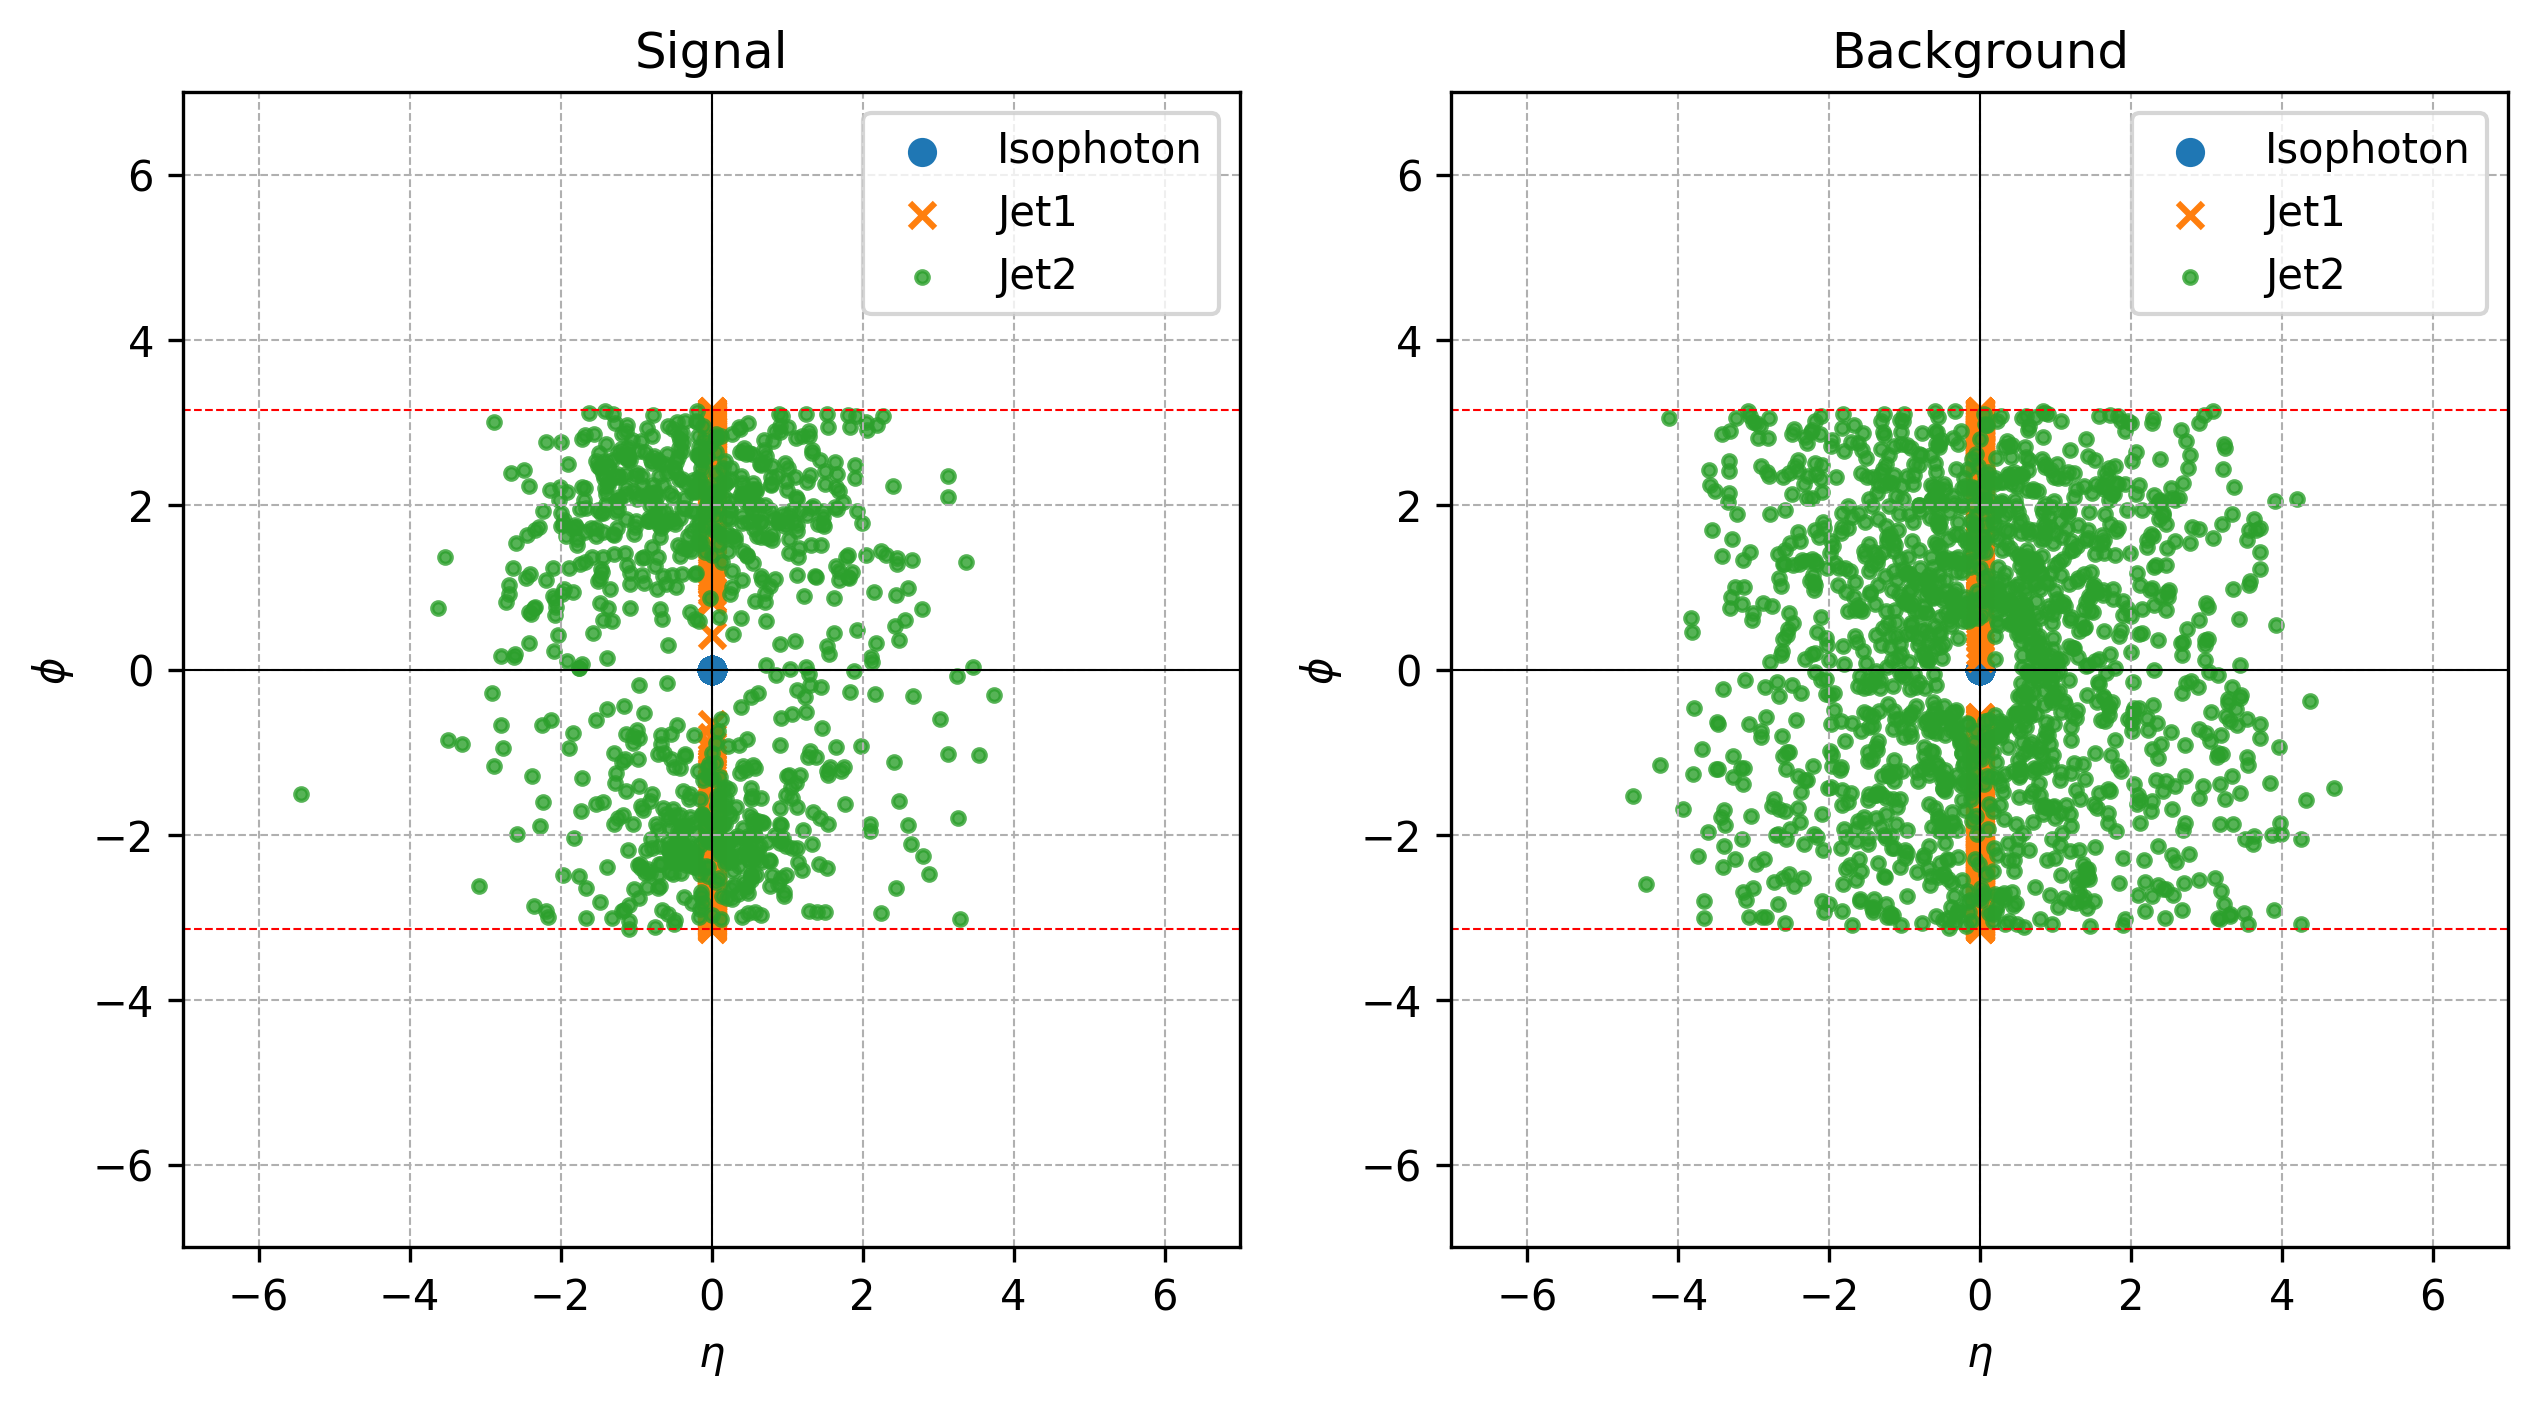

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi = 300)
processor.plot_all(signal_rotated,
                   axs[0], title = 'Signal')
processor.plot_all(background_rotated,
                   axs[1], title = 'Background')
#plt.savefig('dataset3_transformation_results.png')

In [22]:
signal_rotated.min()

isophoton_Eta    0.000000e+00
isophoton_Phi    0.000000e+00
jet1_Eta        -2.060173e-13
jet1_Phi        -3.140436e+00
jet2_Eta        -5.441152e+00
jet2_Phi        -3.139431e+00
dtype: float64

In [23]:
signal_rotated.max()

isophoton_Eta    0.000000e+00
isophoton_Phi    0.000000e+00
jet1_Eta         1.055609e-13
jet1_Phi         3.141306e+00
jet2_Eta         3.743836e+00
jet2_Phi         3.133407e+00
dtype: float64

In [24]:
np.rad2deg(np.arccos(np.dot([-1.61, 2.08], [0,-1])/np.linalg.norm([-1.61, 2.08]))) #99

142.25875083647762

## 8. Plotting Same Number of data points from Signal and Background

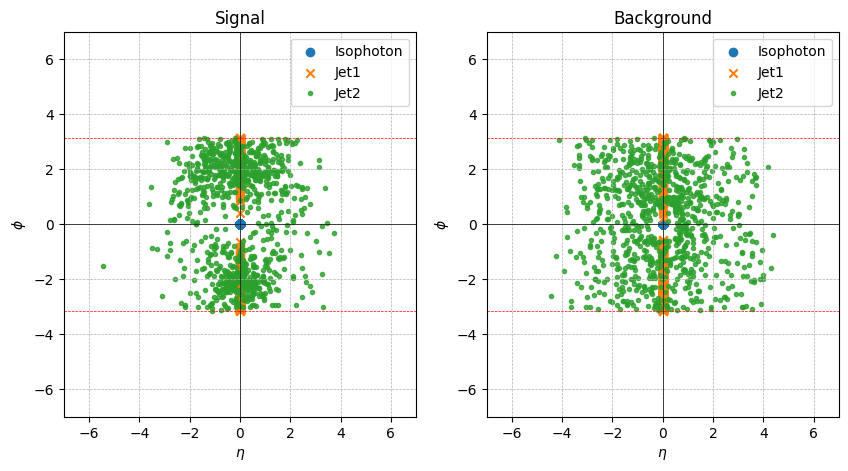

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
processor.plot_all(signal_rotated,
                   axs[0], title = 'Signal')
processor.plot_all(background_rotated.sample(len(signal_rotated)),
                   axs[1], title = 'Background')

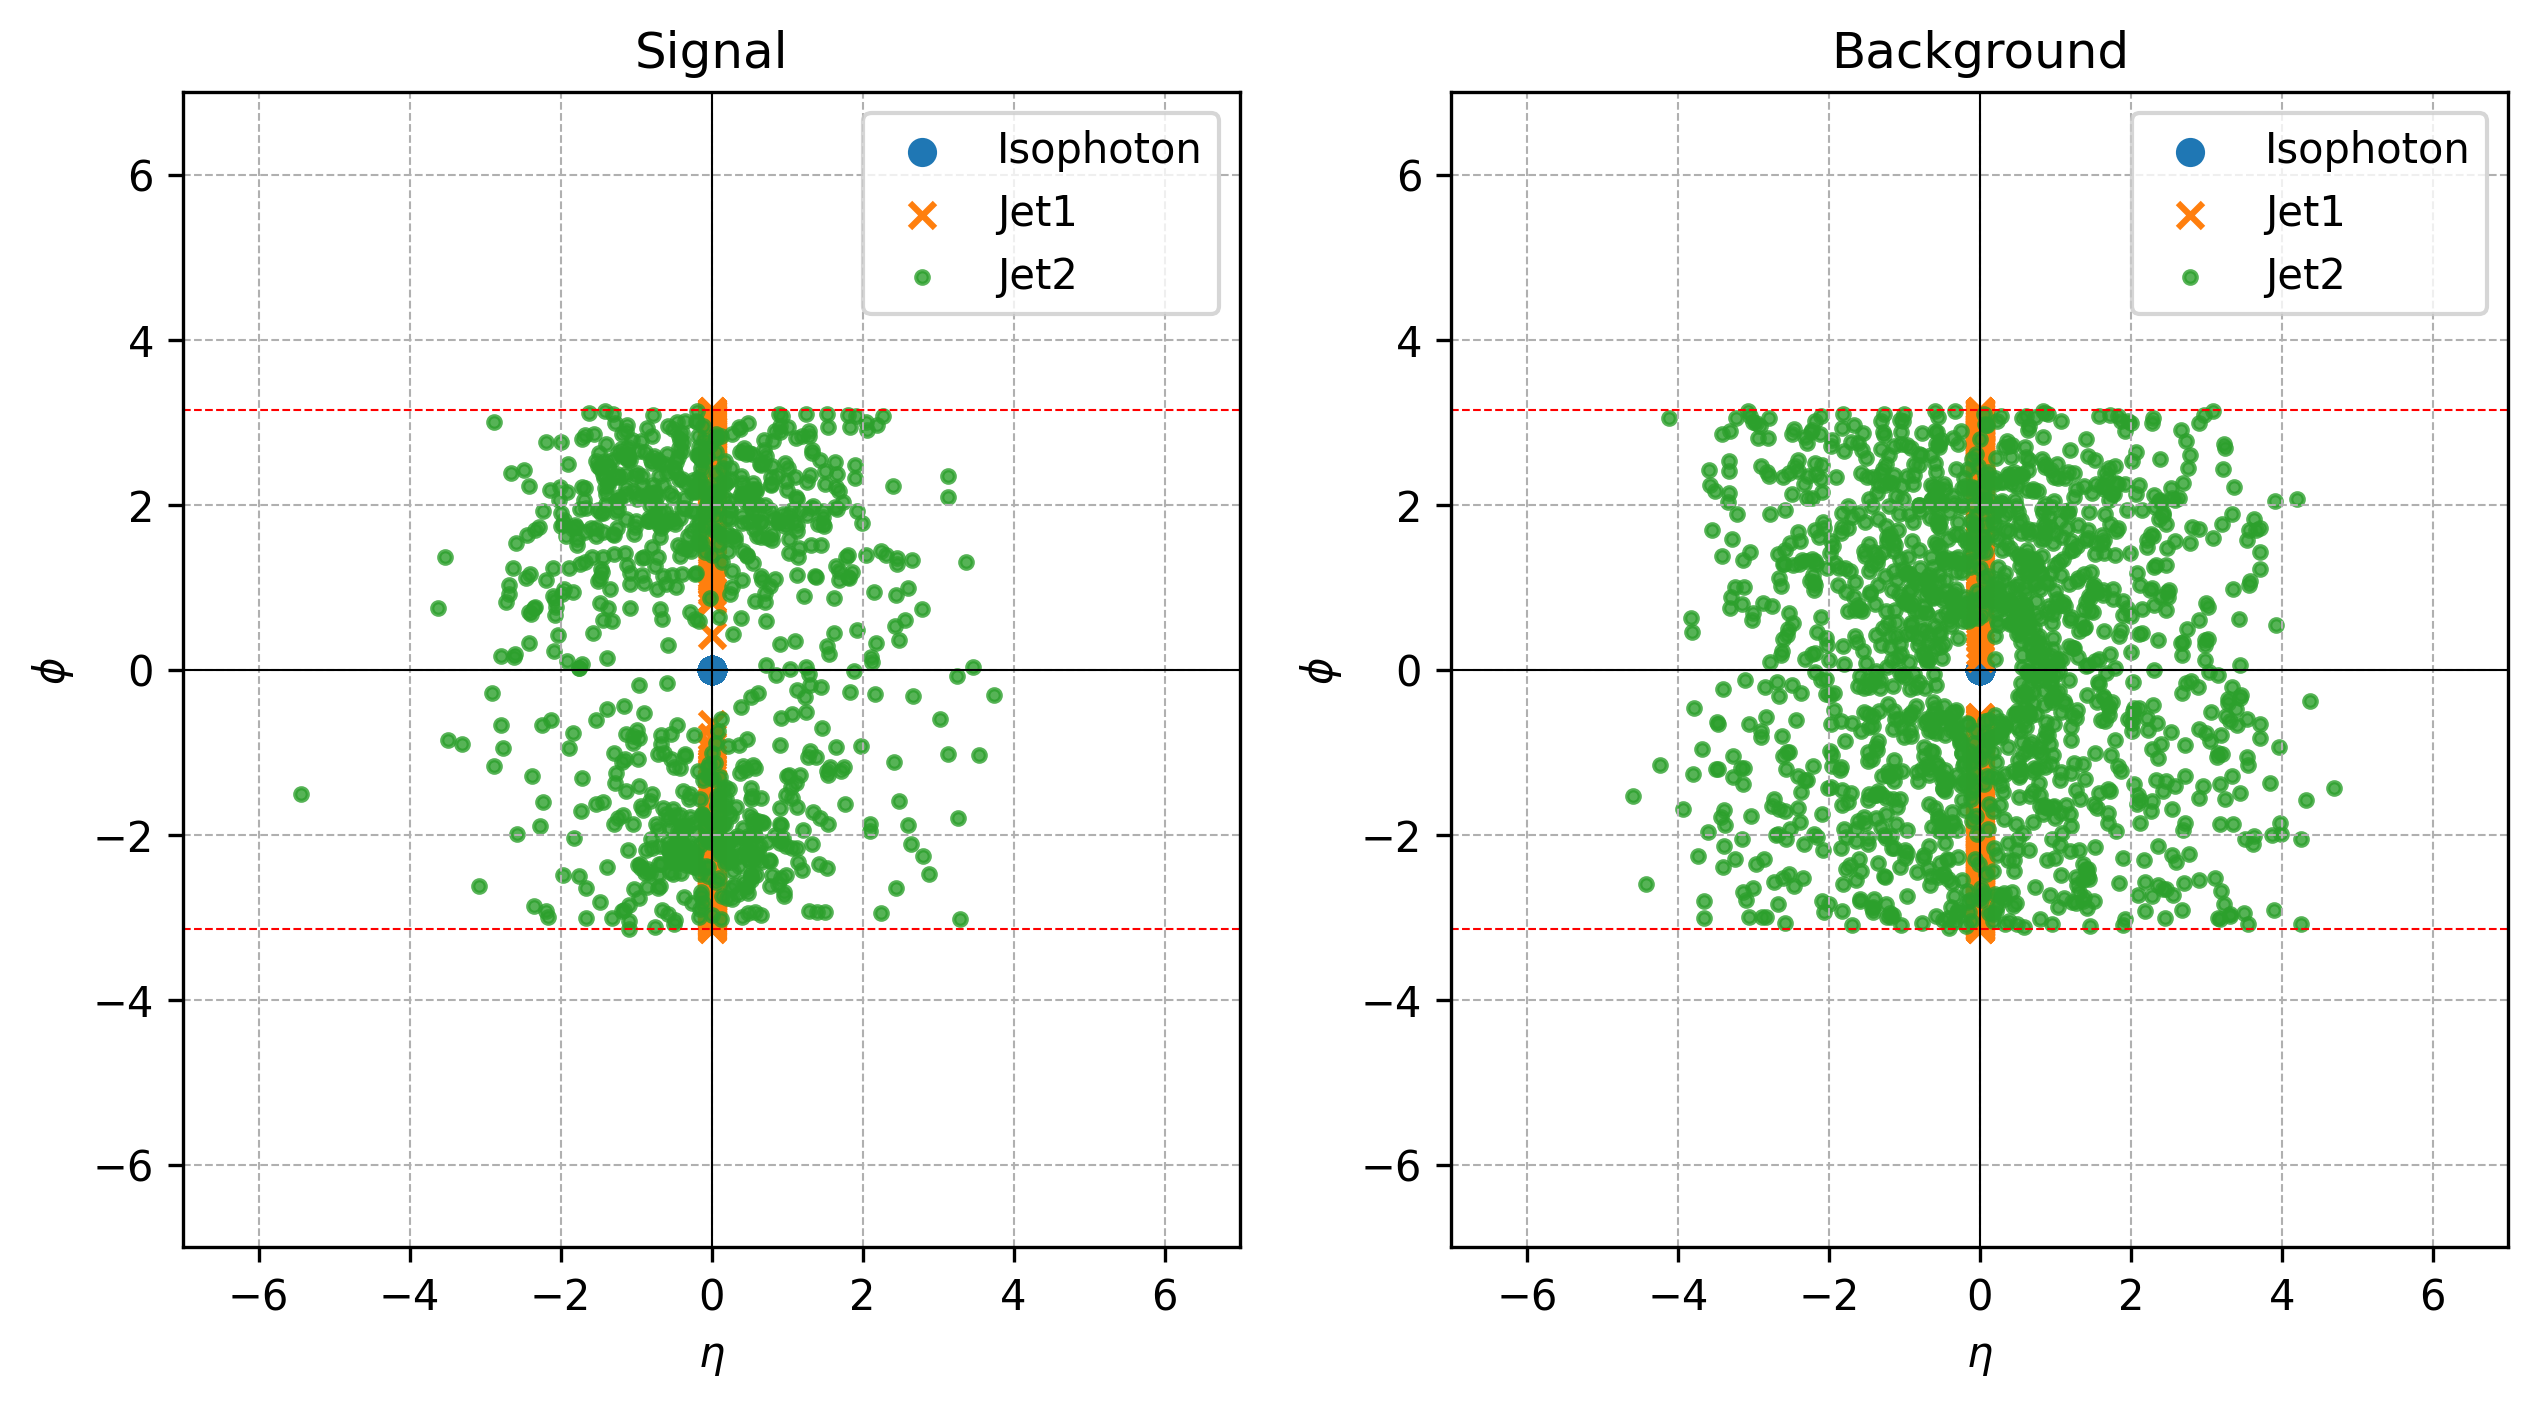

In [26]:
signal_final = processor.complete_transformation(signal_columns_extract, intermediate_bound_phi = False, final_bound_phi = True)
background_final = processor.complete_transformation(background_columns_extract, intermediate_bound_phi = False, final_bound_phi = True)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi = 300)
processor.plot_all(signal_final,
                   axs[0], title = 'Signal')
processor.plot_all(background_final,
                   axs[1], title = 'Background')
#plt.savefig('Final_Only_Bound.png')

## Single Event Comparision

In [27]:
#np.random.seed(13568)
random_index = np.random.randint(0, len(signal))
print(random_index)

567


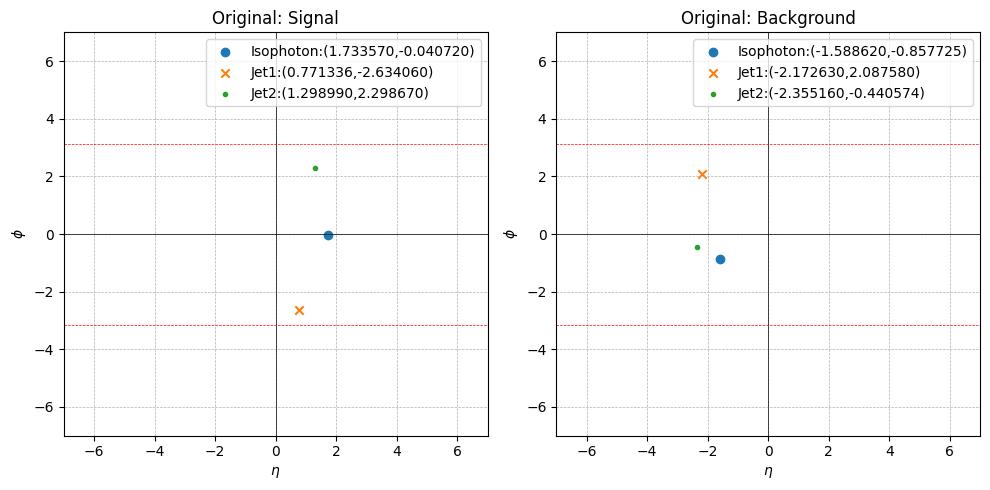

In [28]:
##Original Data
signal_single = pd.DataFrame(signal_columns_extract.iloc[random_index, :]).T
background_single = pd.DataFrame(background_columns_extract.iloc[random_index, :]).T


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
processor.plot_eflow_objects(signal_single.iloc[0,:],
                             axs[0], title = 'Original: Signal')
processor.plot_eflow_objects(background_single.iloc[0,:],
                             axs[1], title = 'Original: Background')

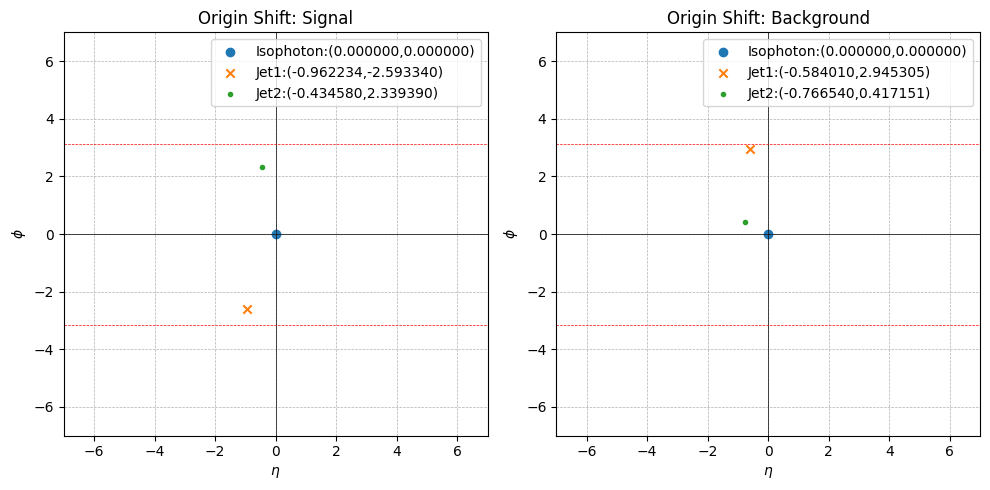

In [29]:
## Origin Shifting
signal_single = processor.shift_origin(signal_single)
background_single = processor.shift_origin(background_single)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
processor.plot_eflow_objects(signal_single.iloc[0,:],
                             axs[0], title = 'Origin Shift: Signal')
processor.plot_eflow_objects(background_single.iloc[0,:],
                             axs[1], title = 'Origin Shift: Background')

In [30]:
## Bounding Phi
# signal_single = processor.bound_phi(signal_single) 
# background_single = processor.bound_phi(background_single)

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# processor.plot_eflow_objects(signal_single.iloc[0,:],
#                              axs[0], title = 'Bound Phi: Signal')
# processor.plot_eflow_objects(background_single.iloc[0,:],
#                              axs[1], title = 'Bound Phi: Background')

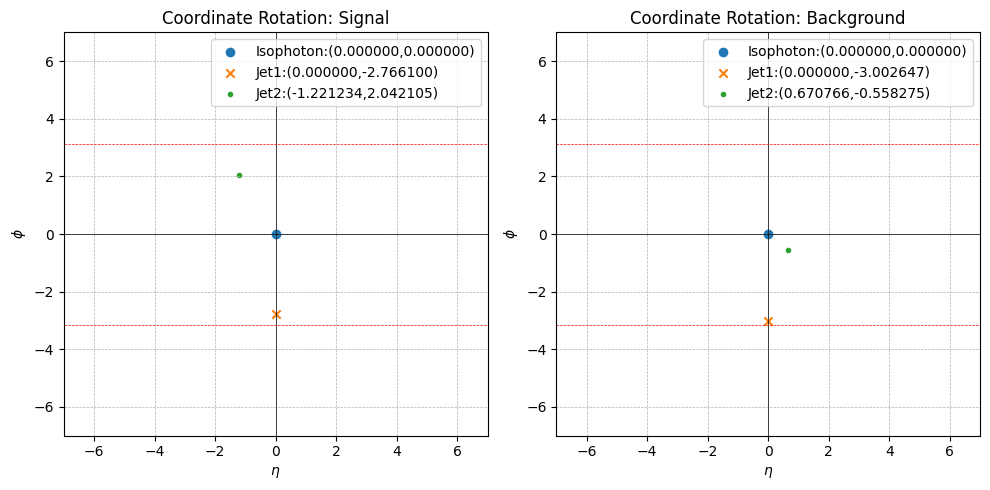

In [31]:
##Coordinate Rotation
signal_single = processor.rotate_coordinates(signal_single) 
background_single = processor.rotate_coordinates(background_single)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
processor.plot_eflow_objects(signal_single.iloc[0,:],
                             axs[0], title = 'Coordinate Rotation: Signal')
processor.plot_eflow_objects(background_single.iloc[0,:],
                             axs[1], title = 'Coordinate Rotation: Background')

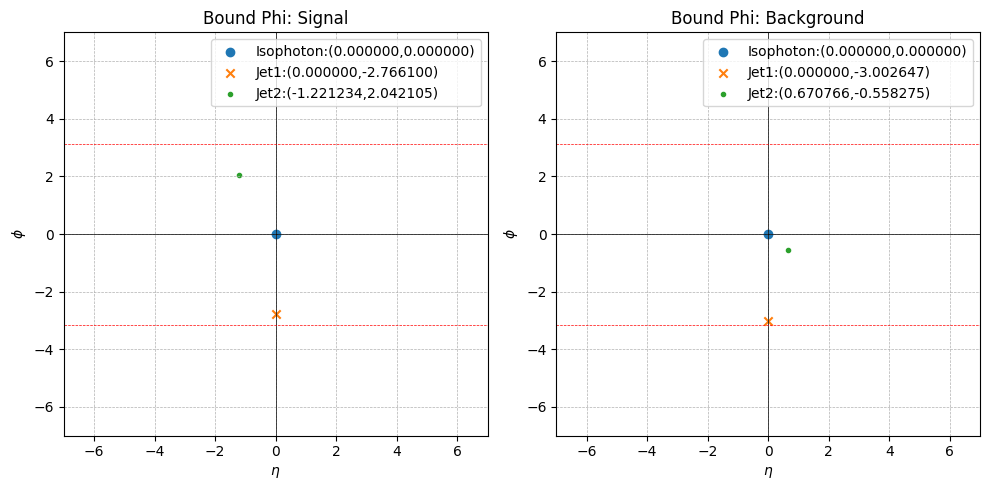

In [32]:

## Bounding Phi
signal_single = processor.bound_phi(signal_single) 
background_single = processor.bound_phi(background_single)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
processor.plot_eflow_objects(signal_single.iloc[0,:],
                             axs[0], title = 'Bound Phi: Signal')
processor.plot_eflow_objects(background_single.iloc[0,:],
                             axs[1], title = 'Bound Phi: Background')

## Invariant Mass Calculation

In [33]:
signal_inv_mass = processor.invariant_mass(signal)
background_inv_mass = processor.invariant_mass(background)

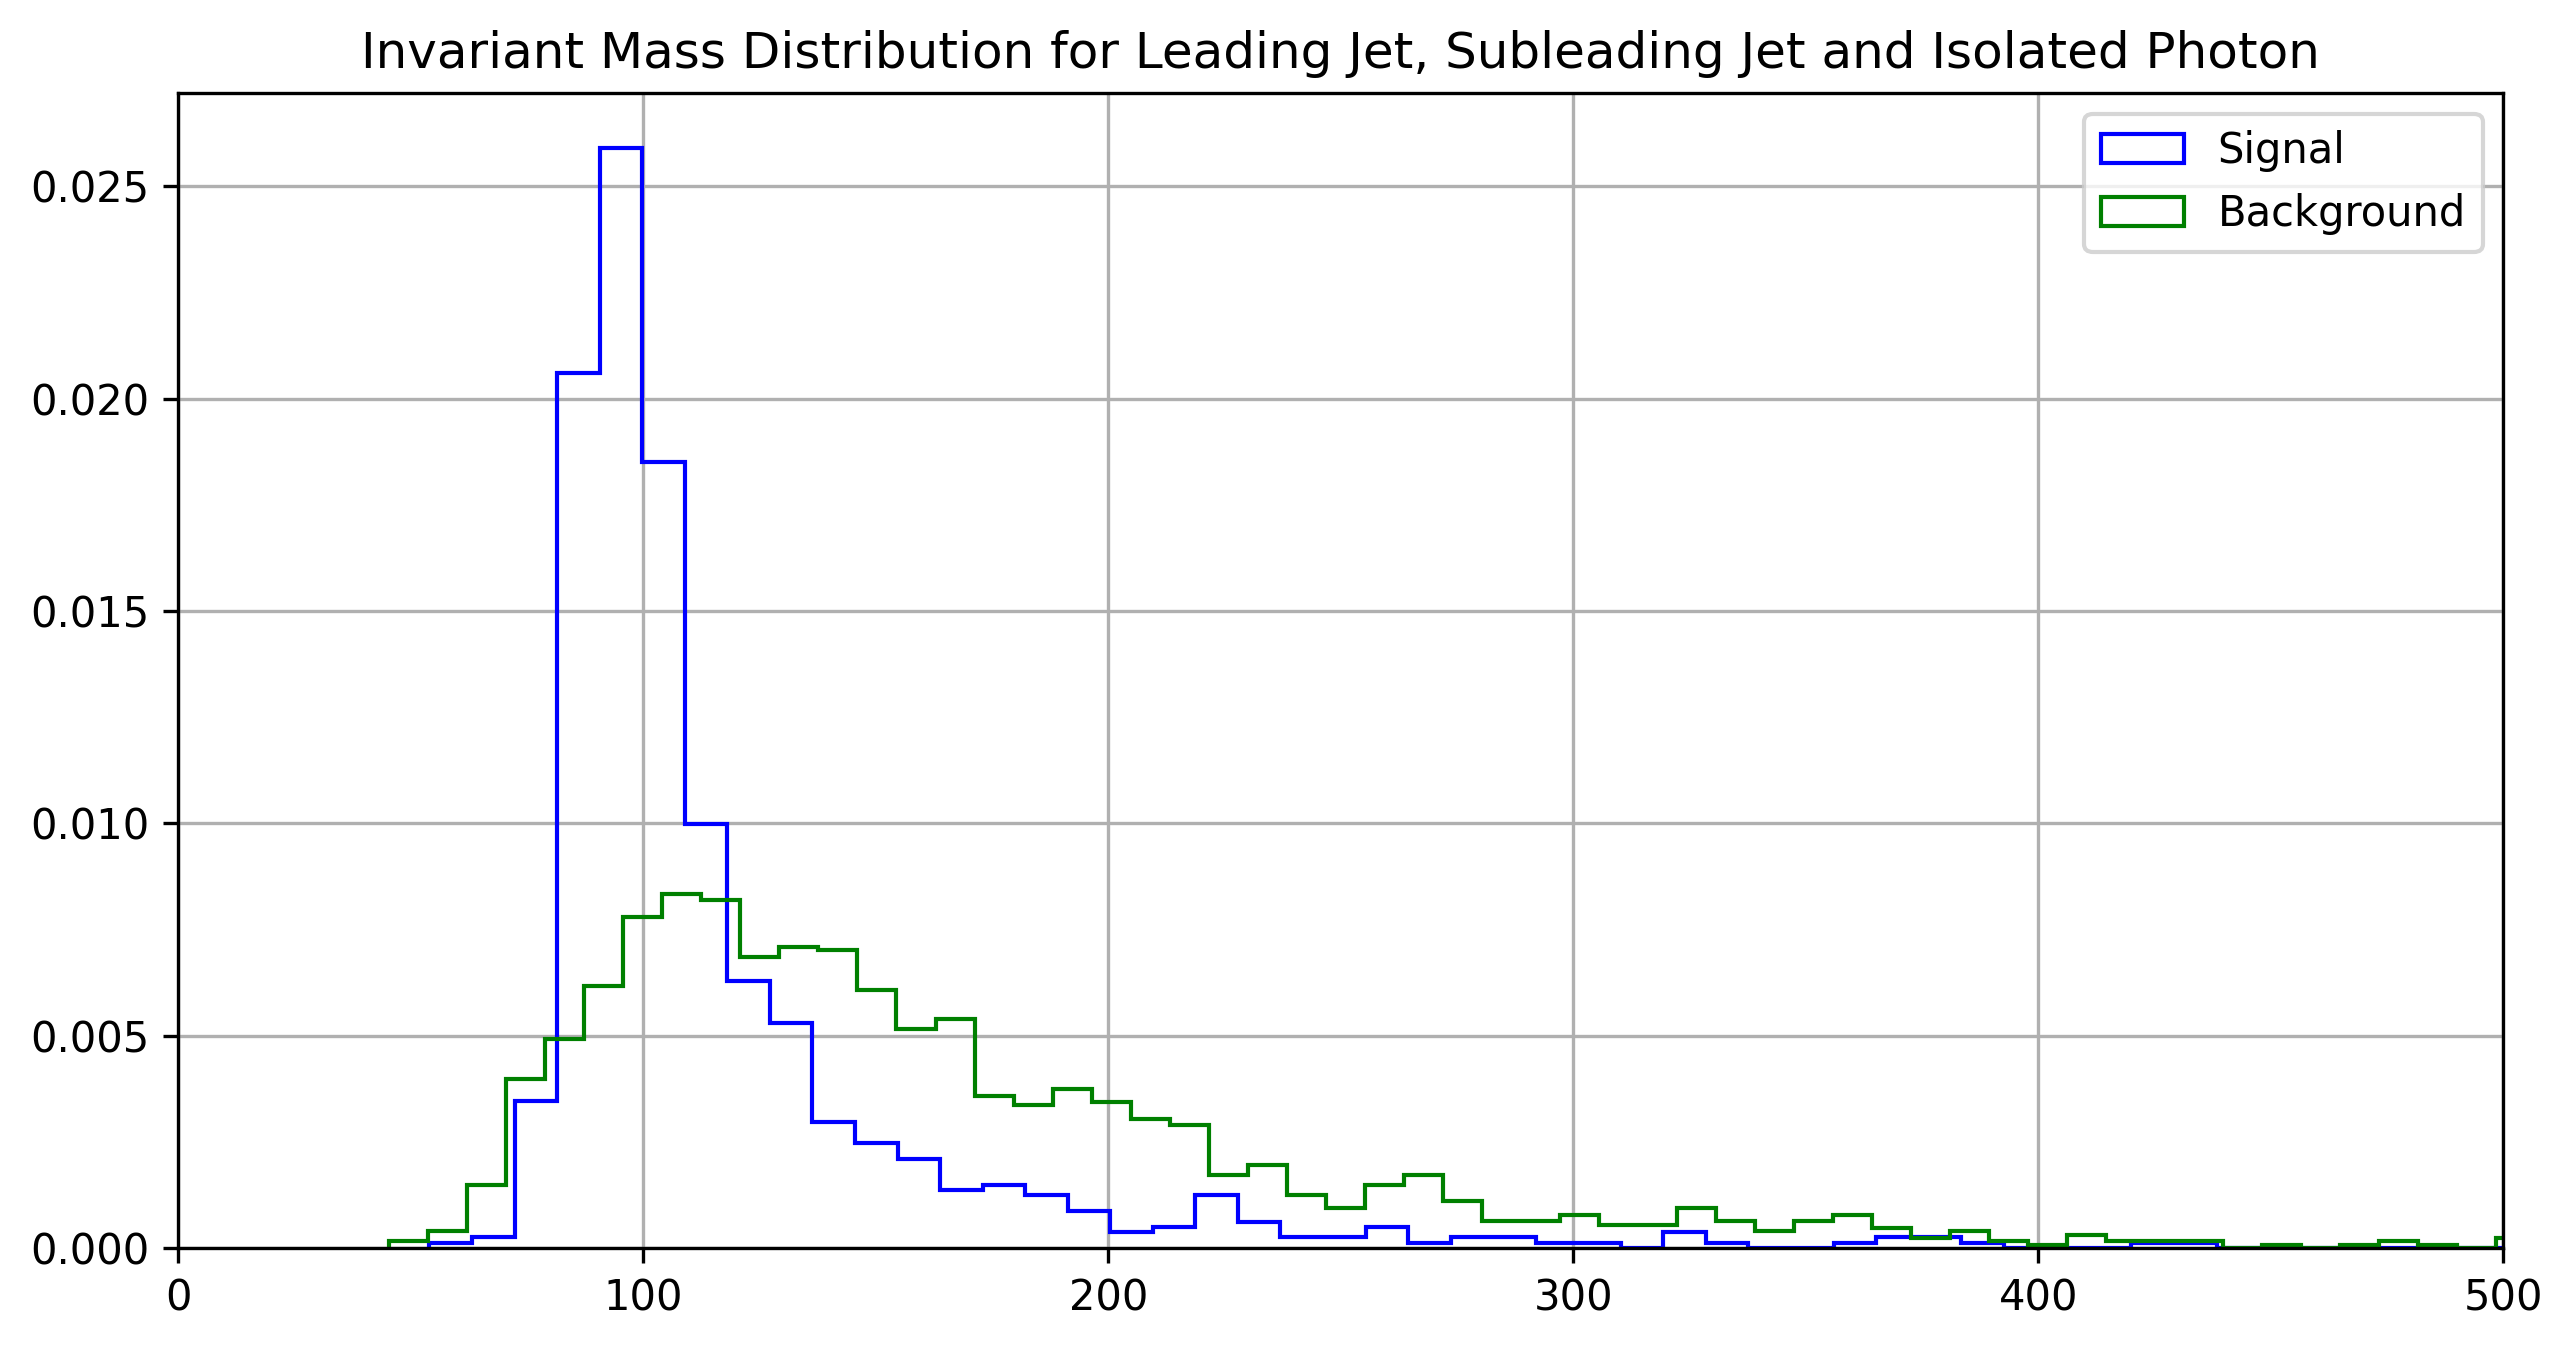

In [34]:
plt.figure(figsize = (10,5), dpi=300)
plt.hist(signal_inv_mass, bins = 100, edgecolor = 'b', label = 'Signal', density = True, color = 'blue', histtype = 'step')
plt.hist(background_inv_mass, bins=100, label = 'Background', density = True, edgecolor = 'green', color = 'green', histtype = 'step')
plt.title('Invariant Mass Distribution for Leading Jet, Subleading Jet and Isolated Photon')
plt.xlim([0, 500])
plt.legend()
plt.grid()
#plt.savefig('invmass_jet.png', dpi = 300)
plt.show()

## Preparing Data for BDT Classifier

In [35]:
# signal_data = {
#     'isophoton_pT' : signal['isophoton_pT'].values,
#     'deltaR_jet12' : signal_sample['R'],
#     'inv_mass' : signal_inv_mass.values.reshape((-1)),
#     'jet1_Eta' : signal['jet1_Eta'].values,
#     'jet2_Eta' : signal['jet2_Eta'].values,
#     'isophoton_Phi' : signal['isophoton_Phi'].values,
#     'jet2_Phi' : signal['jet2_Phi'].values,
#     'label' : np.ones(len(signal), dtype = int)
# }

# signal_bdt = pd.DataFrame(signal_data)

# background_data = {
#     'isophoton_pT' : background['isophoton_pT'].values,
#     'deltaR_jet12' : background_sample['R'],
#     'inv_mass' : background_inv_mass.values.reshape((-1)),
#     'jet1_Eta' : background['jet1_Eta'].values,
#     'jet2_Eta' : background['jet2_Eta'].values,
#     'isophoton_Phi' : background['isophoton_Phi'].values,
#     'jet2_Phi' : background['jet2_Phi'].values,
#     'label' : np.zeros(len(background), dtype = int)
# }

# background_bdt = pd.DataFrame(background_data)

In [36]:
# signal_bdt.head()

In [37]:
# background_bdt.head()

In [38]:
# signal_bdt.to_csv('/teamspace/studios/this_studio/BDT/data/signal_bdt_1.txt', sep='\t', index=False)
# background_bdt.to_csv('/teamspace/studios/this_studio/BDT/data/background_bdt_corr.txt', sep='\t', index=False)

## 9. Calculating Euclidean Distances, R = $\sqrt{(\Delta \phi)^2 + (\Delta \eta)^2}$
Note: if $\Delta \phi > \pi$ then $\Delta \phi _{new} = 2\pi - \Delta \phi$

In [39]:
# signal_sample = signal_columns_extract.sample(n = 20, random_state = 1234)
signal_sample = signal_columns_extract.copy()
background_sample = background_columns_extract.copy()

In [40]:
signal_sample_transformed = processor.complete_transformation(signal_sample, intermediate_bound_phi = False, final_bound_phi = True)
background_sample_transformed = processor.complete_transformation(background_sample, intermediate_bound_phi = False, final_bound_phi = True)

In [41]:
signal_sample['R'] = processor.Euclidean_distance(signal_sample)
background_sample['R'] = processor.Euclidean_distance(background_sample)

In [42]:
signal_sample_transformed['R'] = processor.Euclidean_distance(signal_sample_transformed)
background_sample_transformed['R'] = processor.Euclidean_distance(background_sample_transformed)

In [43]:
# signal_sample_transformed.to_csv('transformed_complete_2.txt', sep = '\t', index = False)
# signal_sample.to_csv('original_complete_2.txt', sep = '\t', index = False)

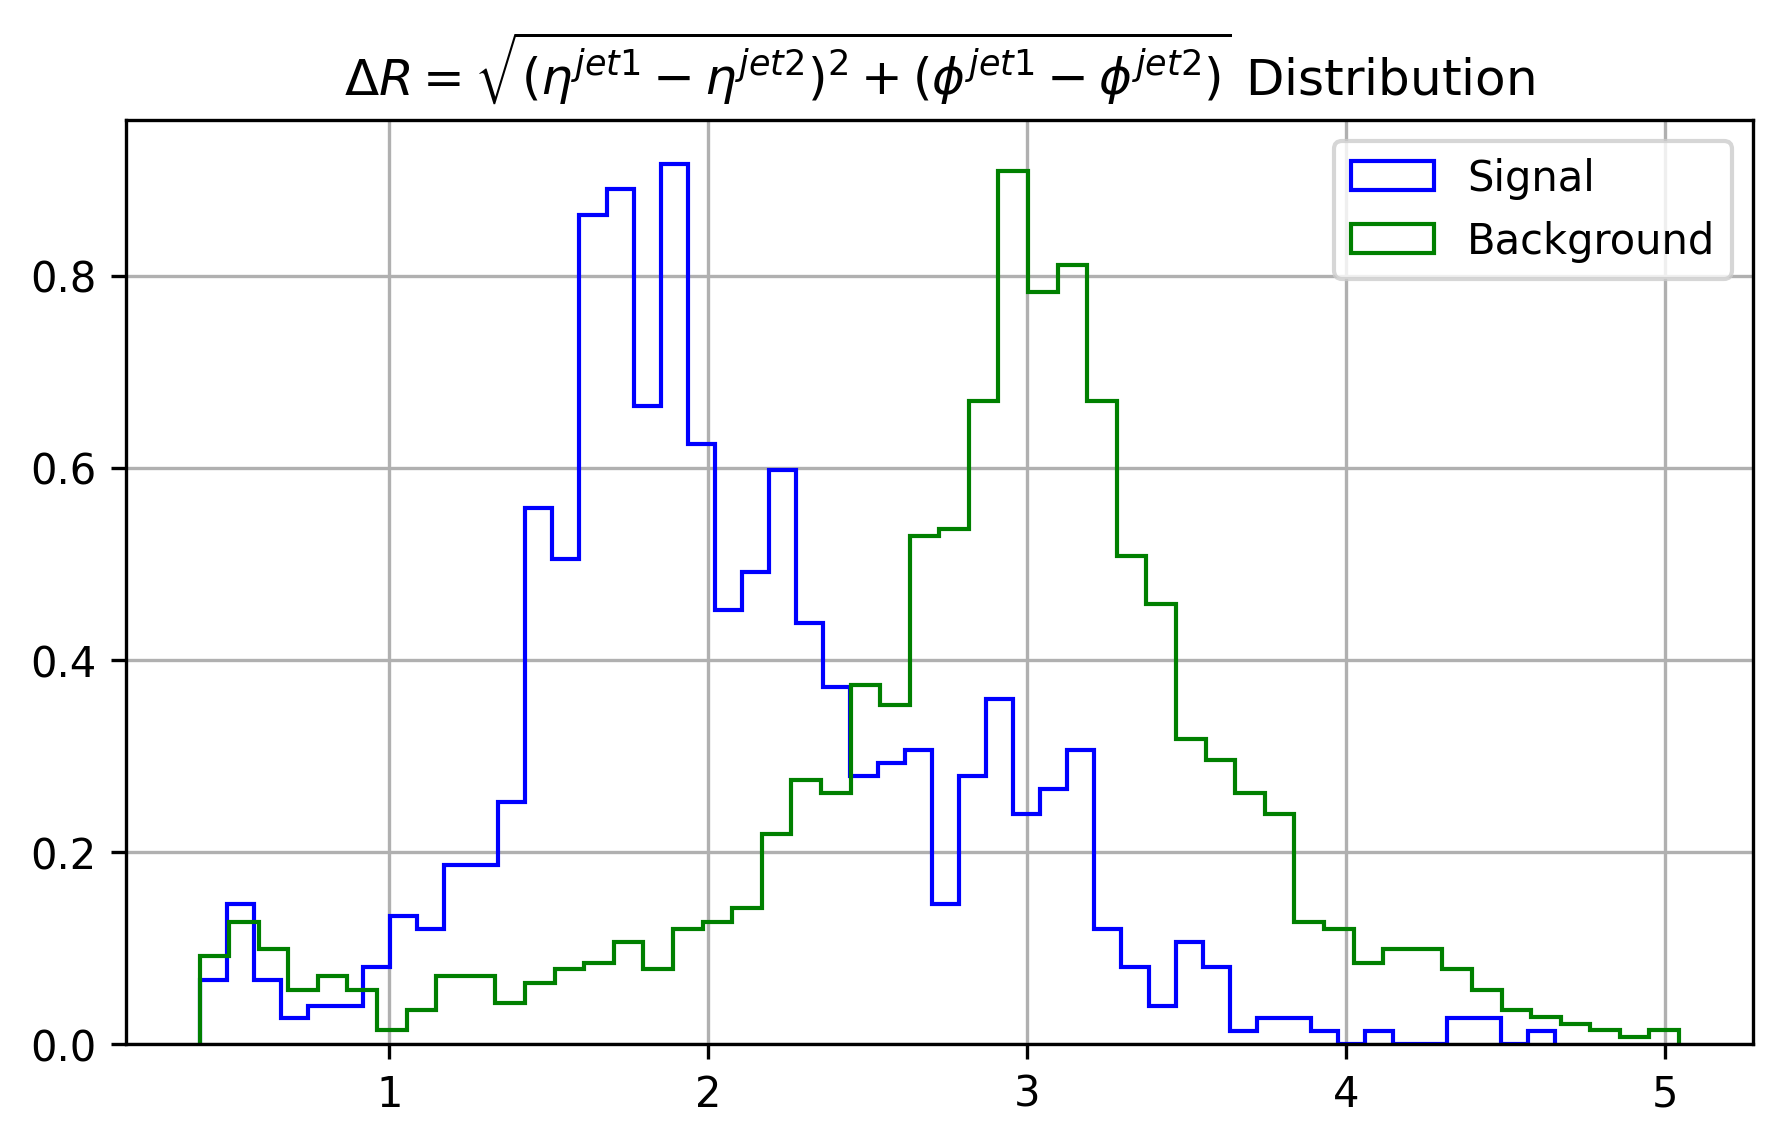

In [44]:
plt.figure(figsize = (7,4), dpi = 300)
plt.hist(signal_sample['R'], bins = 50, label = 'Signal', density = True, color = 'blue', edgecolor = 'blue', histtype = 'step')
plt.hist(background_sample['R'], bins = 50, label = 'Background', density = True, edgecolor = 'green', color = 'green', histtype = 'step')
plt.title('$\Delta R = \sqrt{(\eta^{jet1} - \eta^{jet2})^2 + (\phi^{jet1} - \phi^{jet2})}$ Distribution')
plt.legend()
plt.grid()
#plt.savefig('isophoton_pT.png', dpi = 200)
plt.show()

# Distribution of pT of Isolated Photon

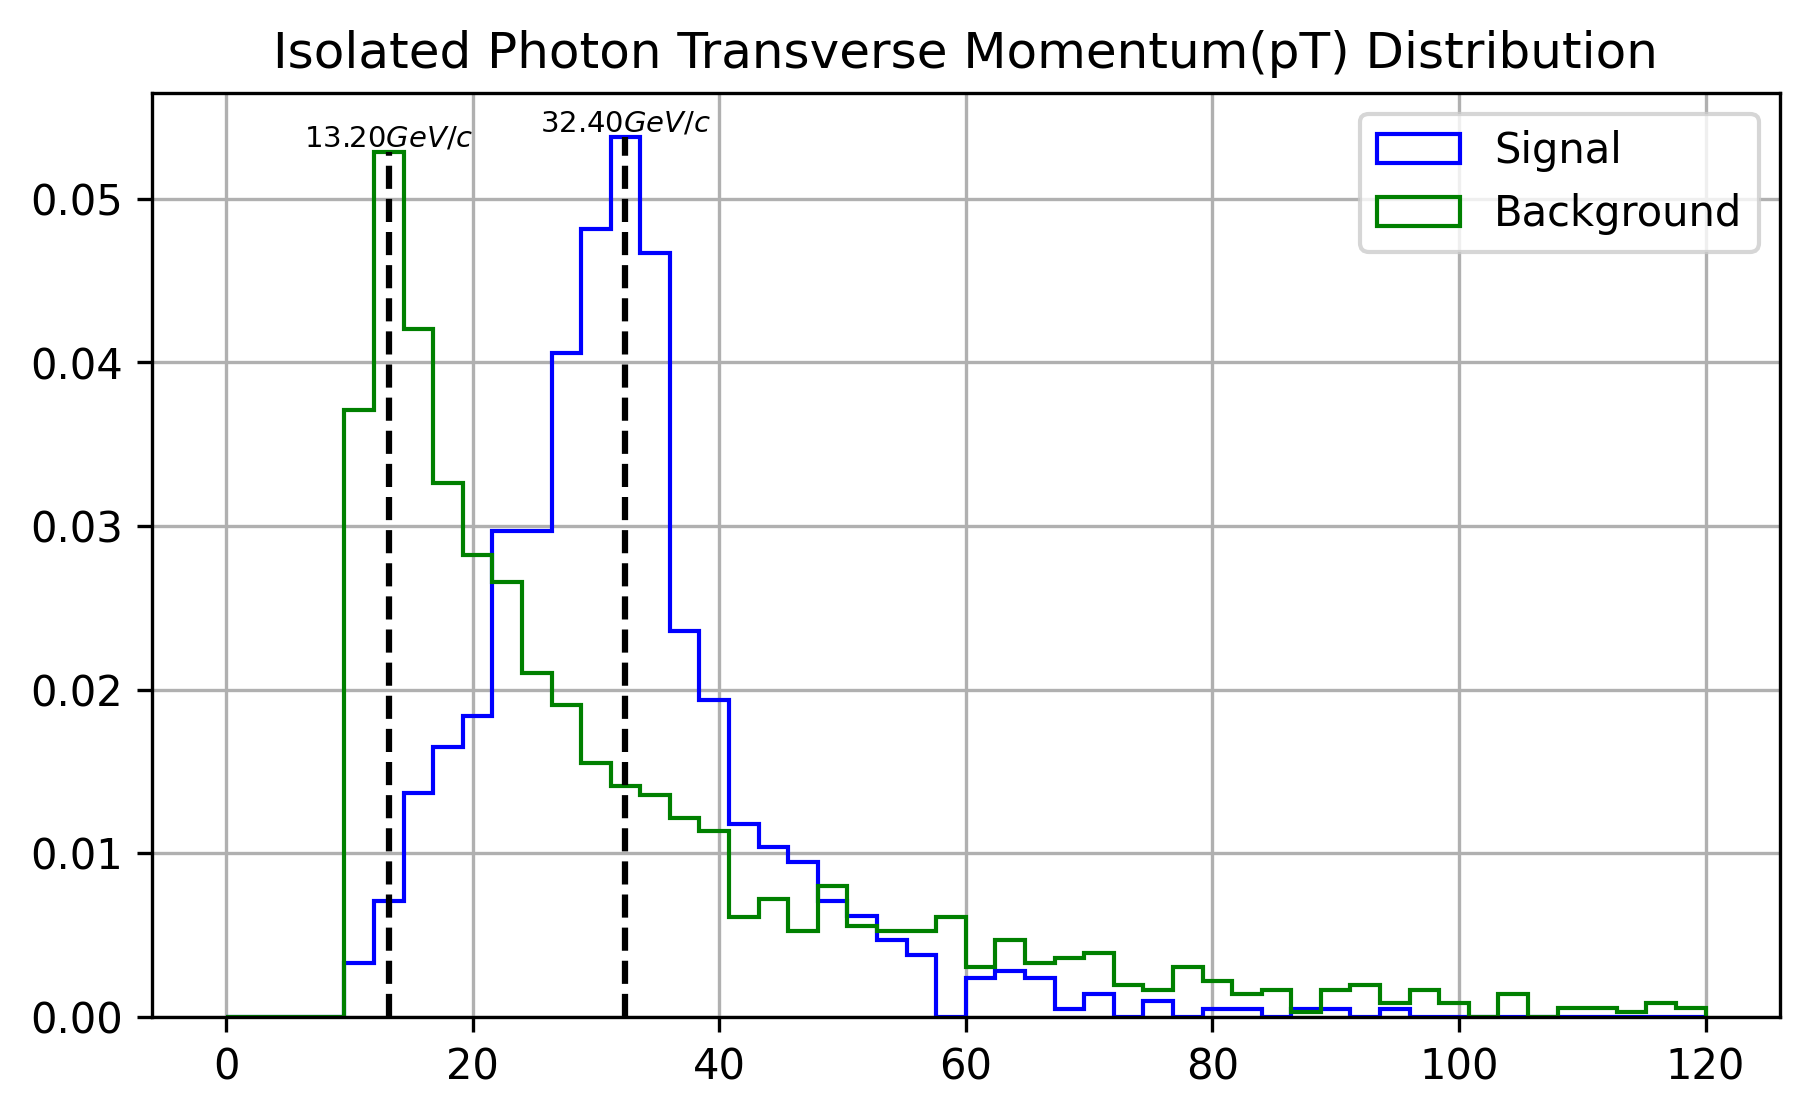

In [45]:
plt.figure(figsize = (7,4), dpi = 300)
signal_pt_hist = plt.hist(signal['isophoton_pT'], bins = 50, range=(0,120),  histtype='step', label = 'Signal', density = True, color = 'blue', edgecolor = 'blue')
background_pt_hist = plt.hist(background['isophoton_pT'], bins = 50, range=(0,120),  histtype='step', label = 'Background', density = True, color = 'green', edgecolor = 'green')

signal_peak_x = np.mean(signal_pt_hist[1][np.argmax(signal_pt_hist[0]):np.argmax(signal_pt_hist[0])+2])
background_peak_x = np.mean(background_pt_hist[1][np.argmax(background_pt_hist[0]):np.argmax(background_pt_hist[0])+2])


plt.vlines(signal_peak_x, 0, signal_pt_hist[0].max(), color = 'k', linestyle = '--')
plt.vlines(background_peak_x, 0, background_pt_hist[0].max(), color = 'k', linestyle = '--')


plt.text(signal_peak_x, max(signal_pt_hist[0]), f'{signal_peak_x:.2f}$GeV/c$', color='k', ha='center', va='bottom', fontsize=7)
plt.text(background_peak_x, max(background_pt_hist[0]), f'{background_peak_x:.2f}$GeV/c$', color='k', ha='center', va='bottom', fontsize=7)


plt.title('Isolated Photon Transverse Momentum(pT) Distribution')
plt.legend()
plt.grid()
#plt.savefig('isophoton_pT.png', dpi = 200)
plt.show()

# Generating Images from Data

In [46]:
import os
import numpy as np
from PIL import Image

def generate_pixel_images(data, intensities, output_dir, grid_size=(51, 51)):
    """
    Generates zero-centered pixel images from (x, y) data with intensity values.

    Parameters:
    - data: List of tuples [(x1, y1), (x2, y2), (x3, y3)] for all records.
    - intensities: List of lists [intensity1, intensity2, intensity3] corresponding to each record.
    - output_dir: Directory to save the generated images.
    - grid_size: Size of the output image grid (default: 51x51).
    """
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Define the range for x and y to center the origin (0,0)
    x_range = (-6, 6)  # η axis range
    y_range = (-7, 7)  # φ axis range
    
    # Scaling factors for mapping coordinates to grid
    x_scale = grid_size[0] / (x_range[1] - x_range[0])
    y_scale = grid_size[1] / (y_range[1] - y_range[0])

    for i, (coords, intensity) in enumerate(zip(data, intensities)):
        # Initialize the grid
        grid = np.zeros(grid_size)
        
        for (x, y), value in zip(coords, intensity):
            # Map coordinates to grid indices
            x_idx = int((x - x_range[0]) * x_scale)
            y_idx = int((y - y_range[0]) * y_scale)
            
            # Ensure indices are within bounds
            x_idx = np.clip(x_idx, 0, grid_size[0] - 1)
            y_idx = np.clip(y_idx, 0, grid_size[1] - 1)
            
            # Set the intensity
            grid[y_idx, x_idx] += value  # No flipping of y-axis
        
        # Normalize grid for better visualization (optional)
        grid = (grid / np.max(grid) * 255).astype(np.uint8) if np.max(grid) > 0 else grid
        
        # Save as an image
        img = Image.fromarray(grid)
        img.save(f"{output_dir}/record_{i+1}.png")


# example_data = [
#     [(2.11, 2.63), (0.49, -1.57), (1.34, 0.68)],  # Example coordinates
#     [(1.5, 2.2), (-1.0, -3.5), (0.9, 1.2)]       # Another record
# ]
# example_intensities = [
#     [0.8, 0.5, 0.7],  # Intensity for the first record
#     [0.9, 0.4, 0.6]   # Intensity for the second record
# ]

In [47]:
signal_intensity = pd.concat([signal['isophoton_pT'], signal['jet1_pT'], signal['jet2_pT']], axis = 1)
background_intensity = pd.concat([background['isophoton_pT'], background['jet1_pT'], background['jet2_pT']], axis = 1)

In [48]:
#Preparing the list of pT values in the format to feed into the function
signal_intensity_lst = []
for row in signal_intensity.itertuples():
    signal_intensity_lst.append([row.isophoton_pT, row.jet1_pT, row.jet2_pT])

background_intensity_lst = []
for row in background_intensity.itertuples():
    background_intensity_lst.append([row.isophoton_pT, row.jet1_pT, row.jet2_pT])

In [49]:
#Preparing the coordinate list
signal_coordinates = []
for row in signal_final.itertuples():
    result = [(row.isophoton_Eta, row.isophoton_Phi), (row.jet1_Eta, row.jet1_Phi), (row.jet2_Eta, row.jet2_Phi)]
    signal_coordinates.append(result)

background_coordinates = []
for row in background_final.itertuples():
    result = [(row.isophoton_Eta, row.isophoton_Phi), (row.jet1_Eta, row.jet1_Phi), (row.jet2_Eta, row.jet2_Phi)]
    background_coordinates.append(result)


In [50]:
#Saving Signal Images
signal_output_dir = '/teamspace/studios/this_studio/EFlow Images/data/btagged_images/signal'
generate_pixel_images(signal_coordinates, signal_intensity_lst, signal_output_dir)

In [51]:
#Saving Background Images
background_output_dir = '/teamspace/studios/this_studio/EFlow Images/data/btagged_images/background'
generate_pixel_images(background_coordinates, background_intensity_lst, background_output_dir)

# Calculating $\Delta R$ for isoloated photon and the jets

In [56]:
signal_sample['iso_jet1_R'] = processor.Euclidean_distance(signal_sample , obj1 = 'isophoton', obj2 = 'jet1')
signal_sample['iso_jet2_R'] = processor.Euclidean_distance(signal_sample , obj1 = 'isophoton', obj2 = 'jet2')
background_sample['iso_jet1_R'] = processor.Euclidean_distance(background_sample, obj1 = 'isophoton', obj2 = 'jet1')
background_sample['iso_jet2_R'] = processor.Euclidean_distance(background_sample, obj1 = 'isophoton', obj2 = 'jet2')

# Data Prep for GNN 

In [58]:
# signal_data = {
#     'isophoton_Eta' : signal['isophoton_Eta'].values,
#     'isophoton_Phi' : signal['isophoton_Phi'].values,
#     'isophoton_pT' : signal['isophoton_pT'].values,
#     'isophoton_Px' : signal['isophoton_Px'].values,
#     'isophoton_Py' : signal['isophoton_Py'].values,
#     'isophoton_Pz' : signal['isophoton_Pz'].values,
#     'isophoton_E' : signal['isophoton_E'].values,
#     'jet1_Eta' : signal['jet1_Eta'].values,
#     'jet1_Phi' : signal['jet1_Phi'].values,
#     'jet1_pT' : signal['jet1_pT'].values,
#     'jet1_Px' : signal['jet1_Px'].values,
#     'jet1_Py' : signal['jet1_Py'].values,
#     'jet1_Pz' : signal['jet1_Pz'].values,
#     'jet1_E' : signal['jet1_E'].values,
#     'jet2_Eta' : signal['jet2_Eta'].values,
#     'jet2_Phi' : signal['jet2_Phi'].values,
#     'jet2_pT' : signal['jet2_pT'].values,
#     'jet2_Px' : signal['jet2_Px'].values,
#     'jet2_Py' : signal['jet2_Py'].values,
#     'jet2_Pz' : signal['jet2_Pz'].values,
#     'jet2_E' : signal['jet2_E'].values,
#     'jet_multiplicity' : signal['jetmultiplicity'],
#     'deltaR_jet12' : signal_sample['R'],
#     'deltaR_iso_jet1' : signal_sample['iso_jet1_R'],
#     'deltaR_iso_jet2' : signal_sample['iso_jet2_R'],
#     'inv_mass' : signal_inv_mass.values.reshape((-1)),
#     'label' : np.ones(len(signal), dtype = int)
# }

# signal_gnn = pd.DataFrame(signal_data)

# background_data = {
#     'isophoton_Eta' : background['isophoton_Eta'].values,
#     'isophoton_Phi' : background['isophoton_Phi'].values,
#     'isophoton_pT' : background['isophoton_pT'].values,
#     'isophoton_Px' : background['isophoton_Px'].values,
#     'isophoton_Py' : background['isophoton_Py'].values,
#     'isophoton_Pz' : background['isophoton_Pz'].values,
#     'isophoton_E' : background['isophoton_E'].values,
#     'jet1_Eta' : background['jet1_Eta'].values,
#     'jet1_Phi' : background['jet1_Phi'].values,
#     'jet1_pT' : background['jet1_pT'].values,
#     'jet1_Px' : background['jet1_Px'].values,
#     'jet1_Py' : background['jet1_Py'].values,
#     'jet1_Pz' : background['jet1_Pz'].values,
#     'jet1_E' : background['jet1_E'].values,
#     'jet2_Eta' : background['jet2_Eta'].values,
#     'jet2_Phi' : background['jet2_Phi'].values,
#     'jet2_pT' : background['jet2_pT'].values,
#     'jet2_Px' : background['jet2_Px'].values,
#     'jet2_Py' : background['jet2_Py'].values,
#     'jet2_Pz' : background['jet2_Pz'].values,
#     'jet2_E' : background['jet2_E'].values,
#     'jet_multiplicity' : background['jetmultiplicity'],
#     'deltaR_jet12' : background_sample['R'],
#     'deltaR_iso_jet1' : background_sample['iso_jet1_R'],
#     'deltaR_iso_jet2' : background_sample['iso_jet2_R'],
#     'inv_mass' : background_inv_mass.values.reshape((-1)),
#     'label' : np.zeros(len(background), dtype = int)
# }

# background_gnn = pd.DataFrame(background_data)

In [59]:
# signal_gnn.to_csv('/teamspace/studios/this_studio/GNN/data/signal_gnn.txt', sep='\t', index=False)
# background_gnn.to_csv('/teamspace/studios/this_studio/GNN/data/background_gnn.txt', sep='\t', index=False)